In [1]:
import os
import torch
import pytorch_lightning as pl
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

from omegaconf import OmegaConf

from ldm.models.autoencoder import VQModel, AutoencoderKL
from ldm.util import instantiate_from_config
from ldm.data.lsun import LSUNCatsTrain, LSUNCatsValidation

### Create model from config and load checkpoint

In [9]:
modeldir = '../models/first_stage_models/vq-f8/'
config = OmegaConf.load(os.path.join(modeldir, 'config.yaml'))
model = instantiate_from_config(config.model)
model.init_from_ckpt(os.path.join(modeldir, 'model.ckpt'))

making attention of type 'vanilla' with 512 in_channels
making attention of type 'vanilla' with 512 in_channels
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels
making attention of type 'vanilla' with 512 in_channels
making attention of type 'vanilla' with 512 in_channels
making attention of type 'vanilla' with 512 in_channels
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Restored from ../models/first_stage_models/vq-f8/model.ckpt with 0 missing and 0 unexpected keys


### Load LSUN dataset

### Validate model

In [16]:
batch = torch.rand((5, 3, 64, 64))
dec, _ = model.forward(batch)
dec = dec.detach()

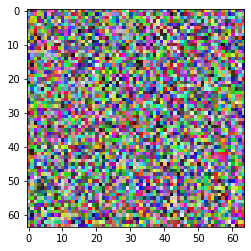

In [17]:
plt.imshow(batch[0].permute(1,2,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


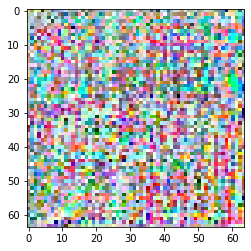

In [18]:
plt.imshow(dec[0].permute(1,2,0))